<a href="https://colab.research.google.com/github/veronicalimpooikhoon/sdaai-iti103/blob/master/session-1/1_Introduction_to_Machine_Learning_and_Toolkit_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning and Toolkit Exercises 

In [30]:
import pandas as pd
import numpy as np

s = pd.Series([1, 0, 2, -4], index=['a', 'b', 'c', 'd'])

data = {'country': ['Japan', 'Thailand', 'Indonesia'], 'capital': ['Tokyo', 'Bangkok', 'Jakarta'], 'population': [126800000, 69040000, 264000000]}
df = pd.DataFrame(data, columns=['country', 'capital', 'population']) 


step_data = [3620, 7891, 9761, 3907, 4338, 5373]
step_counts = pd.Series(step_data, name='steps')
# print(step_counts)

step_counts.index = pd.date_range('20150329', periods=6)
# print(step_counts)

# print(step_counts['2015-04-01'])
# print(step_counts[3])
# print(step_counts['2015-04'])

# View the data type
# print(step_counts.dtypes)
# Convert to a float
step_counts = step_counts.astype(float)
# View the data type
# print(step_counts.dtypes)

# Create invalid data
step_counts[1:3] = np.NaN
# Now fill it in with zeros
step_counts = step_counts.fillna(0.)
# equivalently,
#step_counts.fillna(0., inplace=True)
print(step_counts[1:3])


2015-03-30    0.0
2015-03-31    0.0
Freq: D, Name: steps, dtype: float64


In [29]:
# Cycling distance
cycling_data = [10.7, 0, None, 2.4, 15.3, 10.9, 0, None]

# Create a tuple of data
joined_data = list(zip(step_data, cycling_data))

activity_df = pd.DataFrame(joined_data)

print(activity_df)

      0     1
0  3620  10.7
1  7891   0.0
2  9761   NaN
3  3907   2.4
4  4338  15.3
5  5373  10.9


In [32]:
# Add column names to dataframe
activity_df = pd.DataFrame(joined_data, index=pd.date_range('20150329', periods=6), columns=['Walking','Cycling'])
print(activity_df)

            Walking  Cycling
2015-03-29     3620     10.7
2015-03-30     7891      0.0
2015-03-31     9761      NaN
2015-04-01     3907      2.4
2015-04-02     4338     15.3
2015-04-03     5373     10.9


In [36]:
# Select row of data by index name
print(activity_df.loc['2015-04-01'])

# Select row of data by integer position
print(activity_df.iloc[-3])

# Name of column
print(activity_df['Walking'])

Walking    3907.0
Cycling       2.4
Name: 2015-04-01 00:00:00, dtype: float64
Walking    3907.0
Cycling       2.4
Name: 2015-04-01 00:00:00, dtype: float64
2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


In [39]:
# Object-oriented approach
print(activity_df.Walking)

# First column
print(activity_df.iloc[:,0])

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64
2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


In [41]:
# The location of the data file
filepath = 'https://raw.githubusercontent.com/nyp-sit/data/master/Iris_Data.csv'
# Import the data
data = pd.read_csv(filepath)
# Print a few rows
print(data.iloc[:5])

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [44]:
# Create a new column that is a product
# of both measurements
data['sepal_area'] = data.sepal_length *data.sepal_width
# Print a few rows and columns
print(data.iloc[:5, -3:])
data

   petal_width      species  sepal_area
0          0.2  Iris-setosa       17.85
1          0.2  Iris-setosa       14.70
2          0.2  Iris-setosa       15.04
3          0.2  Iris-setosa       14.26
4          0.2  Iris-setosa       18.00


,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,20.10
146,6.3,2.5,5.0,1.9,Iris-virginica,15.75
147,6.5,3.0,5.2,2.0,Iris-virginica,19.50
148,6.2,3.4,5.4,2.3,Iris-virginica,21.08


In [46]:
# The lambda function applies what
# follows it to each row of data
data['abbrev'] = (data.species.apply(lambda x:x.replace('Iris-','')))
# Note that there are other ways to
# accomplish the above
print(data.iloc[:5, -3:])

       species  sepal_area  abbrev
0  Iris-setosa       17.85  setosa
1  Iris-setosa       14.70  setosa
2  Iris-setosa       15.04  setosa
3  Iris-setosa       14.26  setosa
4  Iris-setosa       18.00  setosa


In [48]:
# Concatenate the first two and
# last two rows
small_data = pd.concat([data.iloc[:2],data.iloc[-2:]])
print(small_data.iloc[:,-3:])
# See the 'join' method for
# SQL style joining of dataframes


            species  sepal_area     abbrev
0       Iris-setosa       17.85     setosa
1       Iris-setosa       14.70     setosa
148  Iris-virginica       21.08  virginica
149  Iris-virginica       17.70  virginica


In [50]:
# Use the size method with a
# DataFrame to get count
# For a Series, use the .value_counts
# method
group_sizes = (data.groupby('species').size())
print(group_sizes)

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [52]:
# Mean calculated on a DataFrame
print(data.mean())
# Median calculated on a Series
print(data.petal_length.median())
# Mode calculated on a Series
print(data.petal_length.mode())

sepal_length     5.843333
sepal_width      3.054000
petal_length     3.758667
petal_width      1.198667
sepal_area      17.806533
dtype: float64
4.35
0    1.5
dtype: float64


In [65]:
# Standard dev, variance, and SEM
print(data.petal_length.std(), data.petal_length.var(), data.petal_length.sem())
# As well as quantiles
print(data.quantile(0))

1.7644204199522617 3.1131794183445156 0.1440643240210084
sepal_length     4.3
sepal_width      2.0
petal_length     1.0
petal_width      0.1
sepal_area      10.0
Name: 0, dtype: float64


In [56]:
print(data.describe())

       sepal_length  sepal_width  petal_length  petal_width  sepal_area
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667   17.806533
std        0.828066     0.433594      1.764420     0.763161    3.368693
min        4.300000     2.000000      1.000000     0.100000   10.000000
25%        5.100000     2.800000      1.600000     0.300000   15.645000
50%        5.800000     3.000000      4.350000     1.300000   17.660000
75%        6.400000     3.300000      5.100000     1.800000   20.325000
max        7.900000     4.400000      6.900000     2.500000   30.020000


In [66]:
# Sample 5 rows without replacement
sample = (data.sample(n=5, replace=False, random_state=42))
print(sample.iloc[:,-3:])

             species  sepal_area      abbrev
73   Iris-versicolor       17.08  versicolor
18       Iris-setosa       21.66      setosa
118   Iris-virginica       20.02   virginica
78   Iris-versicolor       17.40  versicolor
76   Iris-versicolor       19.04  versicolor


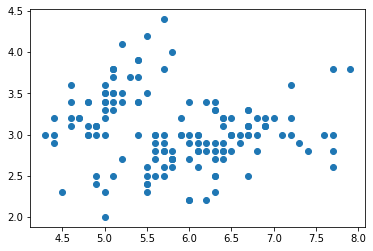

In [78]:
import matplotlib.pyplot as plt

plt.plot(data.sepal_length, data.sepal_width, ls ='', marker='o')

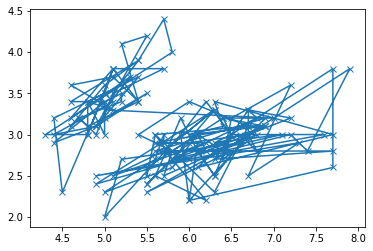

In [79]:
plt.plot(data.sepal_length, data.sepal_width, ls ='-', marker='x')

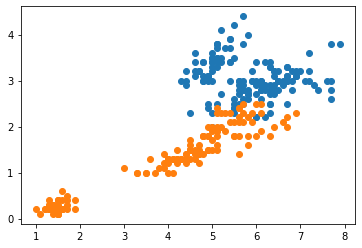

In [80]:
plt.plot(data.sepal_length,data.sepal_width,ls ='', marker='o',label='sepal')

plt.plot(data.petal_length,data.petal_width,ls ='', marker='o',label='petal')

(array([ 4.,  1.,  6.,  5., 16.,  9.,  5.,  6.,  7., 14.,  7.,  9.,  6.,
        13.,  7.,  7.,  8.,  3.,  5.,  1.,  4.,  1.,  1.,  4.,  1.]),
 array([4.3  , 4.444, 4.588, 4.732, 4.876, 5.02 , 5.164, 5.308, 5.452,
        5.596, 5.74 , 5.884, 6.028, 6.172, 6.316, 6.46 , 6.604, 6.748,
        6.892, 7.036, 7.18 , 7.324, 7.468, 7.612, 7.756, 7.9  ]),
 <BarContainer object of 25 artists>)

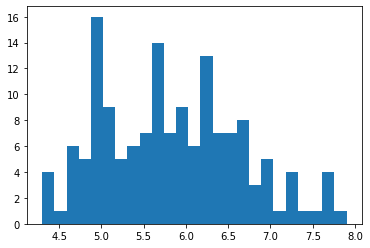

In [88]:
plt.hist(data.sepal_length, bins=25)

[Text(0.5, 0, 'xlabel'), Text(0, 0.5, 'ylabel'), Text(0.5, 1.0, 'Title')]

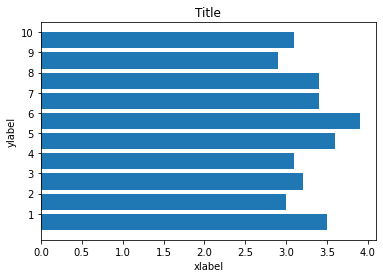

In [91]:
fig, ax = plt.subplots()
ax.barh(np.arange(10),
data.sepal_width.iloc[:10])

# Set position of ticks and tick labels
ax.set_yticks(np.arange(0.4,10.4,1.0))
ax.set_yticklabels(np.arange(1,11))
ax.set(xlabel='xlabel', ylabel='ylabel', title='Title')

<AxesSubplot:xlabel='species'>

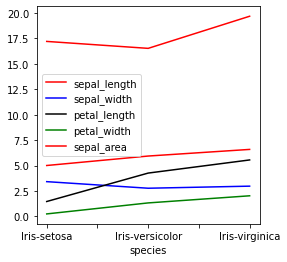

In [93]:
(data.groupby('species').mean().plot(color=['red','blue','black','green'],fontsize=10.0, figsize=(4,4)))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


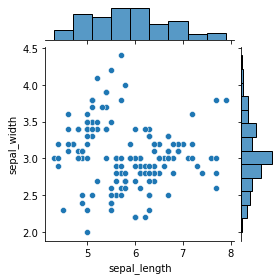

In [95]:
import seaborn as sns
sns.jointplot(x='sepal_length',y='sepal_width',data=data, size=4)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


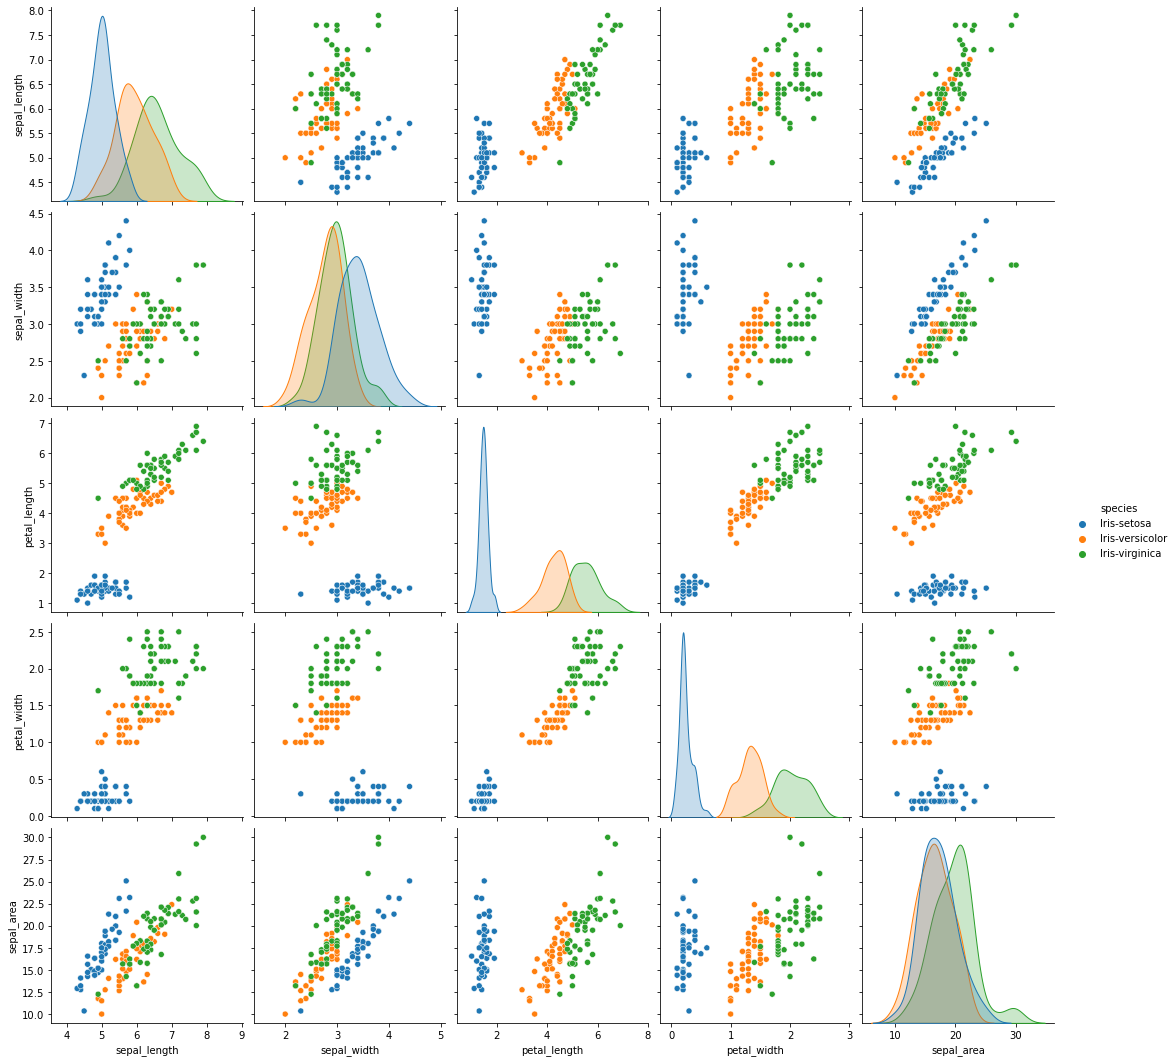

In [98]:
sns.pairplot(data,hue='species', size=3)

## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements.  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The data we will use are in a file called `Iris_Data.csv` found in the repository.

## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [106]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/nyp-sit/data/master/Iris_Data.csv'
data = pd.read_csv(url)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [103]:
# Number of rows (Hint: check out the dataframe .shape attribute.)
print(data.shape)
# print Column names (Hint: check out the dataframe .columns attribute.)
print(data.columns)
# print Data types (Hint: check out the dataframe .dtypes attribute.)
print(data.dtypes)


(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [2]:
#@title  { display-mode: "form" }
# Number of rows
print('Number of rows: {}'.format(data.shape[0]))

# Column names
print(data.columns.tolist())

# Data types
print(data.dtypes)

Number of rows: 150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [107]:
# The str method maps the following function to each entry as a string
data['species'] = data['species'].apply(lambda x: x.replace('Iris-', ''))
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [108]:
#@title
# The str method maps the following function to each entry as a string
data['species'] = data.species.str.replace('Iris-', '')
# alternatively
# data['species'] = data.species.apply(lambda r: r.replace('Iris-', ''))

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [110]:
# use .value_counts() to count each species
data['species'].value_counts()


virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [105]:
#@title
# One way to count each species
data.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [116]:
# Select just the rows desired from the 'describe' method and add in the 'median' (Hint: check out the dataframe .rename attribute.)
stats_df1 = data.describe()
stats_df1.loc['range'] = stats_df1.loc['max'] - stats_df1.loc['min']
stats_df1

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
range,3.600000,2.400000,5.900000,2.400000


In [111]:
#@title
# Select just the rows desired from the 'describe' method and add in the 'median'
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [ ]:
# The mean calculation (Hint: check out the dataframe .groupby attribute.)


In [117]:
#@title
# The mean calculation
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [ ]:
# The median calculation


In [118]:
#@title
# The median calculation
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [121]:
# applying multiple functions at once - 2 methods
data.groupby('species').agg(['mean', 'median'])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [122]:
data.groupby('species').agg([np.mean, np.median])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [119]:
#@title
# applying multiple functions at once - 2 methods

data.groupby('species').agg(['mean', 'median'])  # passing a list of recognized strings
data.groupby('species').agg([np.mean, np.median])  # passing a list of explicit aggregation functions

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [ ]:
# If certain fields need to be aggregated differently, we can do:


In [123]:
#@title
#variable_name = ""
# If certain fields need to be aggregated differently, we can do:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

In [ ]:
import matplotlib.pyplot as plt
# A simple scatter plot with Matplotlib


# Label the axes


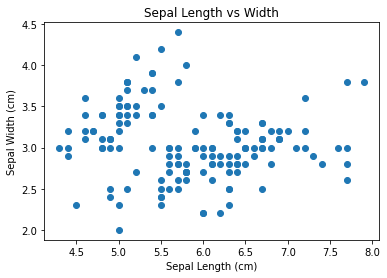

In [124]:
#@title
import matplotlib.pyplot as plt

# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 

In [ ]:
# Using Matplotlib's plotting functionality


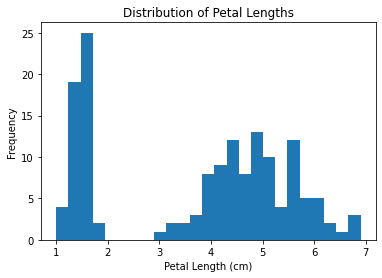

In [125]:
#@title
# Using Matplotlib's plotting functionality
ax = plt.axes()
ax.hist(data.petal_length, bins=25);

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

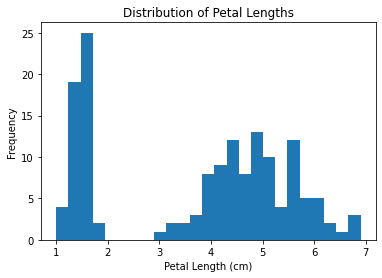

In [126]:
#@title
# Alternatively using Pandas plotting functionality
ax = data.petal_length.plot.hist(bins=25)

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

In [ ]:
#Create a single plot with histograms for each feature (petal_width, petal_length, sepal_width, sepal_length) overlayed.

In [127]:
#@title
try:
    import seaborn as sns

except:
    print('Seaborn must be installed for this course. Execute the following:')
    print('`conda install seaborn`')
    print('from a terminal and restart the kernel.')

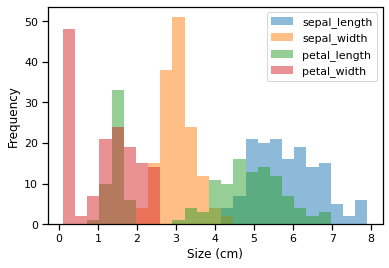

In [128]:
#@title
sns.set_context('notebook')

# This uses the `.plot.hist` method
ax = data.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');

In [ ]:
#Create four individual histogram plots in a single figure, where each plot contains one feature.

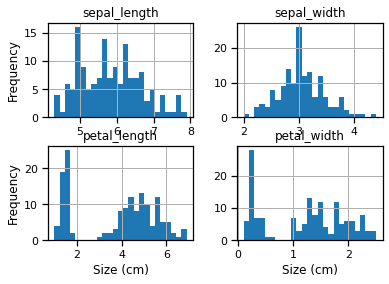

In [129]:
#@title
# To create four separate plots, use Pandas `.hist` method
axList = data.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

In [ ]:
# Pandas plotting functionality is pretty awesome!
# Here we have four separate plots


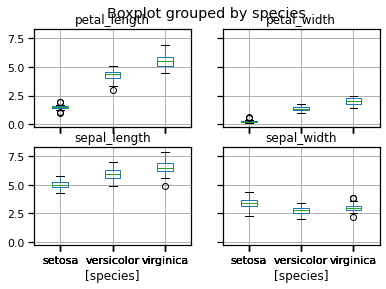

In [130]:
#@title
# Pandas plotting functionality is pretty awesome!
# Here we have four separate plots

data.boxplot(by='species');

## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [ ]:
# First we have to reshape the data so there is 
# only a single measurement in each column

In [131]:
#@title
# First we have to reshape the data so there is 
# only a single measurement in each column

plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


In [ ]:
# Now plot the dataframe from above using Seaborn

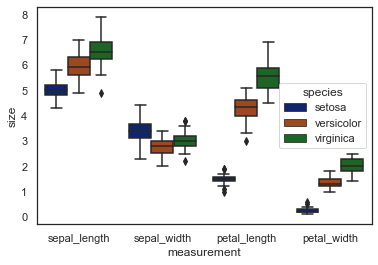

In [132]:
#@title
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);

## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

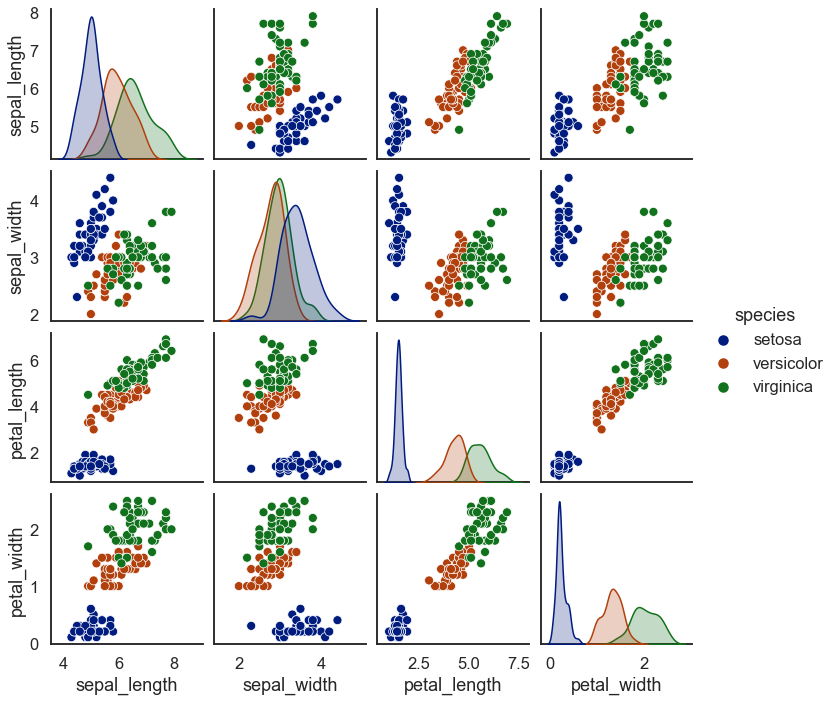

In [151]:
#@title
sns.set_context('talk')
sns.pairplot(data, hue='species');

# Additional for question 9
For question 9, we have a long chain of function which helps to format the data, which have mulitple columns, into one single column.
To Do that, we can use the below way to do it.

In [ ]:
# First we have to reshape the data so there is 
# only a single measurement in each column
# We can
plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

To simplify this, we can split it out into multiple step like below.

In [135]:
print(data)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [138]:
A=data.set_index('species')
A

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
...,...,...,...,...
virginica,6.7,3.0,5.2,2.3
virginica,6.3,2.5,5.0,1.9
virginica,6.5,3.0,5.2,2.0


In [140]:
B = A.stack()
B

species                
setosa     sepal_length    5.1
           sepal_width     3.5
           petal_length    1.4
           petal_width     0.2
           sepal_length    4.9
                          ... 
virginica  petal_width     2.3
           sepal_length    5.9
           sepal_width     3.0
           petal_length    5.1
           petal_width     1.8
Length: 600, dtype: float64

In [142]:
C = B.to_frame()
C

0
species                    
setosa    sepal_length  5.1
          sepal_width   3.5
          petal_length  1.4
          petal_width   0.2
          sepal_length  4.9
...                     ...
virginica petal_width   2.3
          sepal_length  5.9
          sepal_width   3.0
          petal_length  5.1
          petal_width   1.8

[600 rows x 1 columns]

In [146]:
D = C.reset_index()
D

,species,level_1,0
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,sepal_length,5.9
597,virginica,sepal_width,3.0
598,virginica,petal_length,5.1


In [149]:
# To rename the columns name.
E = D.rename(columns={0:'size', 'level_1': 'measurement'})
E

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,sepal_length,5.9
597,virginica,sepal_width,3.0
598,virginica,petal_length,5.1


In [150]:
E.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9
